# [Guía 3](https://drive.google.com/file/d/1wgsntoaDoNvLmp1PfPIb1iycj4szd50u/view?usp=sharing)

http://systems-sciences.uni-graz.at/etextbook/sw2/phpl_python.html

https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

## Imports, Params & Funcs.

In [22]:
import numpy as np
import matplotlib as mtp
plt = mtp.pyplot
import math
import pandas as pd
import scipy as sp
import sympy as sm
import scipy.interpolate as ip
la = np.linalg
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16, 7]
plt.rcParams['axes.grid'] = True
mtp.rcParams['axes.facecolor'] = 'F2D7D5'
#mtp.rcParams['axes.prop_cycle'] = mtp.cycler(color=['c', 'k', 'r'])

In [23]:
def Euler(f, x0, t0, TF, h = False, N = False):
    '''
    Sirve tanto para N como para h, pero hay que explicitarlo
    '''
    if h:
        N = int((TF - t0) / h)
    elif N:    
        h = (TF - t0) / N
    else:
        raise ValueError('Debe haber valor de h o de N asignado') 
    t = np.linspace(t0, TF, N+1)
    x = np.zeros(N + 1)
    x[0] = x0
    for k in range(1, N + 1):
        x[k] = x[k-1] + h * f(t[k-1], x[k-1])
    return t, x


def EulerImplicito(f, x0, t0, TF, h = False, N = False):
    '''
    Sirve tanto para N como para h, pero hay que explicitarlo
    '''
    if h:
        N = int((TF - t0) / h)
    elif N:    
        h = (TF - t0) / N
    else:
        raise ValueError('Debe haber valor de h o de N asignado') 
    t = np.linspace(t0, TF, N+1)
    x = np.zeros(N + 1)
    x[0] = x0
    for k in range(1, N + 1):
        x[k] = x[k-1] + h * f(t[k], x[k])
    return t, x

def Taylor2(f, ft, fx, t0, TF, x0, h = False, N = False):
    '''
    Sirve tanto para N como para h, pero hay que explicitarlo
    '''
    if h:
        N = int((TF - t0) / h)
    elif N:    
        h = (TF - t0) / N
    else:
        raise ValueError('Debe haber valor de h o de N asignado') 
    t = np.linspace(t0, TF, N+1)
    x = np.zeros(N + 1)
    x[0] = x0
    for i in range(1, N + 1):
        x[i] = x[i-1]+ h * f(t[i-1], x[i-1]) + h**2 / 2*(ft(t[i-1], x[i-1]) + fx(t[i-1], x[i-1]) * f(t[i-1], x[i-1]))
    return t, x


def RK2Especifico(f, t0, TF, x0, h = False, N = False, A1 = 0, A2 = 1, alpha = .5):
    '''
    Por defecto es Euler Modificado (A1 = 0, A2 = 1, alpha = 1)
    Sirve tanto para N como para h, pero hay que explicitarlo
    '''
    if A1 + A2 != 1:
        return ValueError('A1 + A2 debe dar exactamente 1')
    if alpha * A2 != .5:
        return ValueError('A2 * alpha debe dar exactamente 1/2')
    if h:
        N = int((TF - t0) / h)
    elif N:    
        h = (TF - t0) / N
    else:
        raise ValueError('Debe haber valor de h o de N asignado') 
    t = np.linspace(t0, TF, N+1)
    x = np.zeros(N + 1)
    x[0] = x0
    for i in range(1, N+1):
        x[i] = x[i-1] + h*A1*f(t[i-1], x[i-1]) + h*A2*f(t[i-1] + alpha*h, x[i-1] + alpha*h*f(t[i-1], x[i-1]))
    return t, x


def Heun(f, t0, TF, x0, h = False, N = False):
    '''
    Sirve tanto para N como para h, pero hay que explicitarlo
    '''
    if h:
        N = int((TF - t0) / h)
    elif N:    
        h = (TF - t0) / N
    else:
        raise ValueError('Debe haber valor de h o de N asignado') 
    t = np.linspace(t0, TF, N+1)
    x = np.zeros(N + 1)
    x[0] = x0
    for i in range(1, N+1):
        K1 = f(t[i-1], x[i-1])
        K2 = f(t[i-1] + h, x[i-1] + h*K1)
        x[i] = x[i-1] + h*(K1+K2) / 2
    return t, x

RK2 = Heun

def EulerModificado(f, t0, TF, x0, h = False, N = False):
    '''
    Sirve tanto para N como para h, pero hay que explicitarlo
    '''
    if h:
        N = int((TF - t0) / h)
    elif N:    
        h = (TF - t0) / N
    else:
        raise ValueError('Debe haber valor de h o de N asignado') 
    t = np.linspace(t0, TF, N+1)
    x = np.zeros(N + 1)
    x[0] = x0
    for i in range(1, N+1):
        x[i] = x[i-1] + h * f(t[i-1] + h/2, x[i-1] + h/2 * f(t[i-1], x[i-1]))
    return t, x



def RK4(f, t0, TF, x0, h = False, N = False):
    '''
    Sirve tanto para N como para h, pero hay que explicitarlo.
    Revisar las condiciones de los K
    '''
    if h:
        N = int((TF - t0) / h)
    elif N:    
        h = (TF - t0) / N
    else:
        raise ValueError('Debe haber valor de h o de N asignado') 
    t = np.linspace(t0, TF, N+1)
    x = np.zeros(N + 1)
    x[0] = x0
    for i in range(1, N+1):
        K1 = f(t[i-1], x[i-1])
        K2 = f(t[i-1] + h/2, x[i-1] + (h/2)*K1)
        K3 = f(t[i-1] + h/2, x[i-1] + (h/2)*K2)
        K4 = f(t[i-1] + h, x[i-1] + h * K3)
        x[i] = x[i-1] + (h/6)*(K1+2*K2 + 2*K3 + K4)
    return t, x


def EulerSistemas(F, X0, t0, TF, h = False, N = False):
    '''
    Sirve tanto para N como para h, pero hay que explicitarlo
    '''
    if len(X0) != F.__code__.co_argcount:
        raise ValueError('X0 debe tener igual cantidad de variables que F')
    if h:
        N = int((TF - t0) / h)
    elif N:    
        h = (TF - t0) / N
    else:
        raise ValueError('Debe haber valor de h o de N asignado') 
    n = len(X0)
    t = np.linspace(t0, TF, N+1)
    X = np.zeros((n, N + 1))
    X[:, 0] = X0
    for k in range(1, N + 1):
        X[:, k] = X[:, k-1] + h * F(t[k-1], X[:, k-1])
    return t, X

def EulerImplicitoSistemas(F, X0, t0, TF, h = False, N = False):
    '''
    Sirve tanto para N como para h, pero hay que explicitarlo
    '''
    if len(X0) != F.__code__.co_argcount:
        raise ValueError('X0 debe tener igual cantidad de variables que F')
    if h:
        N = int((TF - t0) / h)
    elif N:    
        h = (TF - t0) / N
    else:
        raise ValueError('Debe haber valor de h o de N asignado') 
    n = len(X0)
    t = np.linspace(t0, TF, N+1)
    X = np.zeros((n, N + 1))
    X[:, 0] = X0
    for k in range(1, N + 1):
        X[:, k] = X[:, k-1] + h * f(t[k], X[:, k])
    return t, X

def EulerModificadoSistemas(F, X0, t0, TF, h = False, N = False):
    '''
    Sirve tanto para N como para h, pero hay que explicitarlo
    '''
    if len(X0) != F.__code__.co_argcount:
        raise ValueError('X0 debe tener igual cantidad de variables que F')
    if h:
        N = int((TF - t0) / h)
    elif N:    
        h = (TF - t0) / N
    else:
        raise ValueError('Debe haber valor de h o de N asignado') 
    n = len(X0)
    t = np.linspace(t0, TF, N+1)
    X = np.zeros((n, N + 1))
    X[:, 0] = X0
    for i in range(1, N+1):
        X[:, i] = X[:, i-1] + h * F(t[i-1] + h/2, X[:,i-1] + h/2 * F(t[i-1], X[:,i-1]))
    return t, X

def EncontrarEquilibrios(F1, F2, xy_max = 100):
    '''
    BruteForce para encontrar equilibrios en sistemas de dos ecuaciones difs.
    Las funciones no deben estar definidas en f(x, y), NO en f(t, X)
    '''
    eqs = []
    for x in range(t_max):
        for y in range(t_max):
            if ((F1(x, y) == 0) and (F2(x, y) == 0)):
                eqs.append((x, y))
    return eqs

## Ejercicio 1

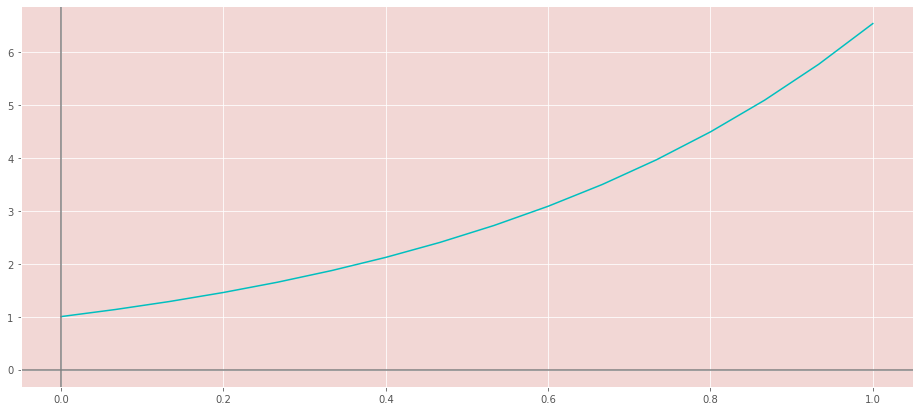

In [ ]:
def f(t, x):
    return 2 * x

t, x = Euler(f, 1, 0, 1, 15)
plt.plot(t, x)
plt.axvline(color='gray')
plt.axhline(color='gray')

## Ejercicio 2

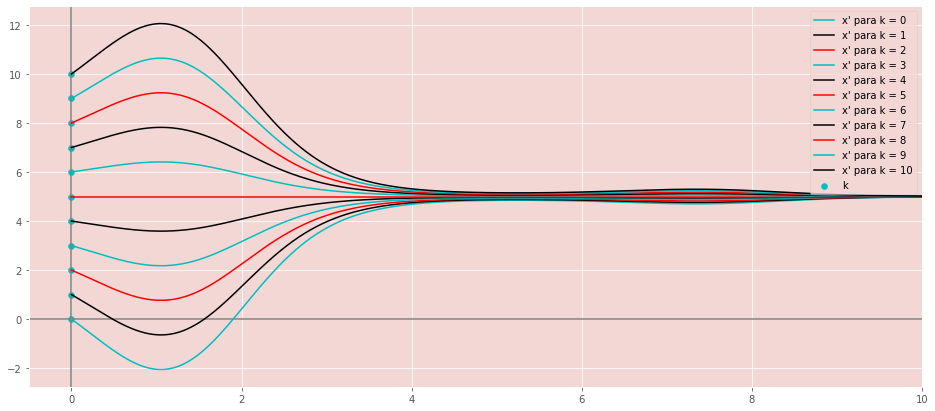

In [ ]:
def f(t, x):
    return (x - 5) * (np.cos(t) - .5)

ks = list(range(11))
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.scatter(np.zeros(len(ks)), ks, label='k')
plt.xlim(-.5, 10)
for k in ks:
    t, x = EulerH(f, k, 0, 20, 0.01)
    plt.plot(t, x, label = "x' para k = " + str(k))

plt.legend()


## Ejercicio 3

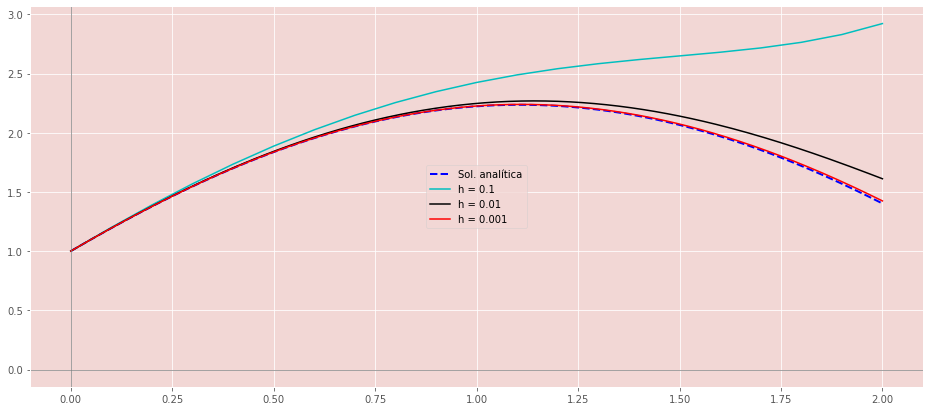

In [ ]:
def f(t, x):
    return 2 * x - 5 * np.sin(t)

def sol(t):
    return 2 * np.sin(t) + np.cos(t)

t_plot = np.linspace(0, 2, 500)
x_plot = [sol(t) for t in t_plot]

plt.plot(t_plot, x_plot, label='Sol. analítica', color='blue', ls='--', lw=2)
hs = [.1, .01, .001]

for h in hs:
    t, x = EulerH(f, 1, 0, 2, h)
    plt.plot(t, x, label='h = ' + str(h))

plt.axvline(color='gray', lw=.7)
plt.axhline(color='gray', lw=.7)
plt.legend()

## Ejercicio 5

### c )

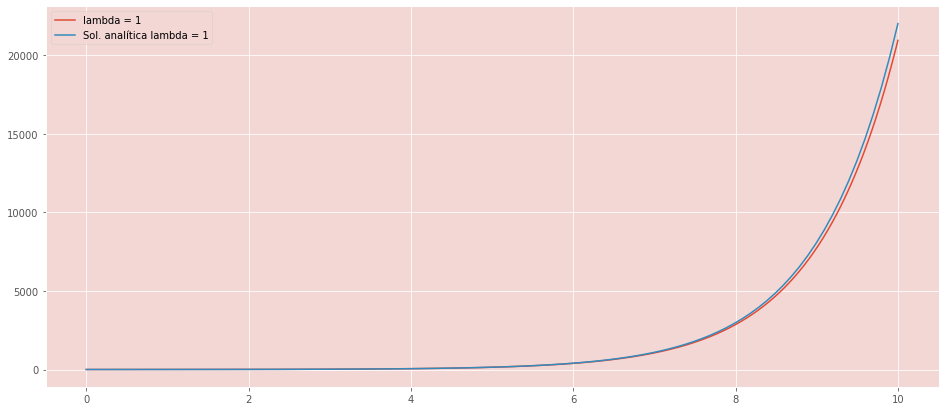

In [ ]:
def f(t, x):
    return lambd * x

def sol(t):
    return np.exp(lambd * t)    

lambdas = [1]
tf = 10
x0 = 1
t0 = 0
h = 0.01

t_plot = np.linspace(t0, tf, 100)
for lambd in lambdas:
    (t1, x1) = Euler(f, x0, t0, tf, h=h)
    plt.plot(t1, x1, label= 'lambda = '+str(lambd))
    plt.plot(t_plot, sol(t_plot), label='Sol. analítica lambda = ' + str(lambd))

plt.legend()

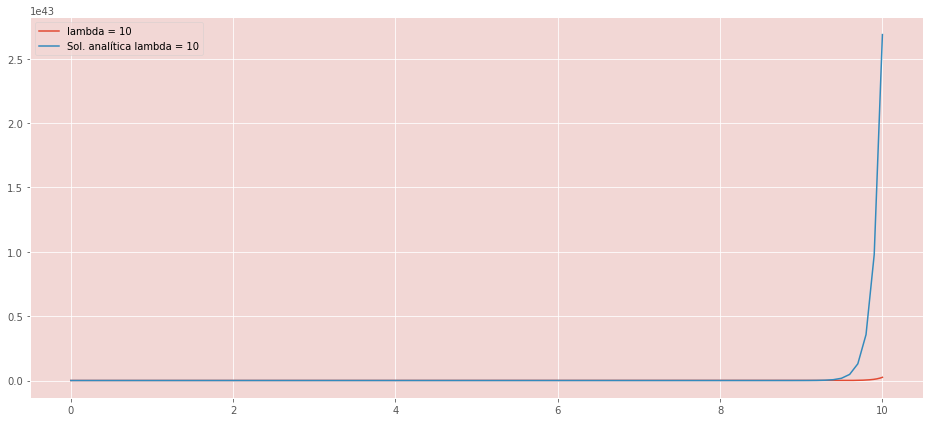

In [ ]:
lambdas = [10]
for lambd in lambdas:
    (t1, x1) = Euler(f, x0, t0, tf, h=h)
    plt.plot(t1, x1, label= 'lambda = '+str(lambd))
    plt.plot(t_plot, sol(t_plot), label='Sol. analítica lambda = ' + str(lambd))

plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


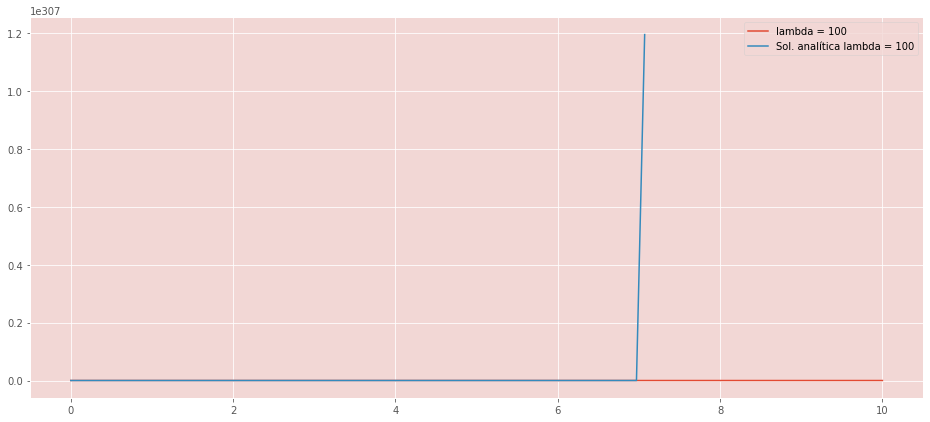

In [ ]:
lambdas = [100]
for lambd in lambdas:
    (t1, x1) = Euler(f, x0, t0, tf, h=h)
    plt.plot(t1, x1, label= 'lambda = '+str(lambd))
    plt.plot(t_plot, sol(t_plot), label='Sol. analítica lambda = ' + str(lambd))

plt.legend()

### d)

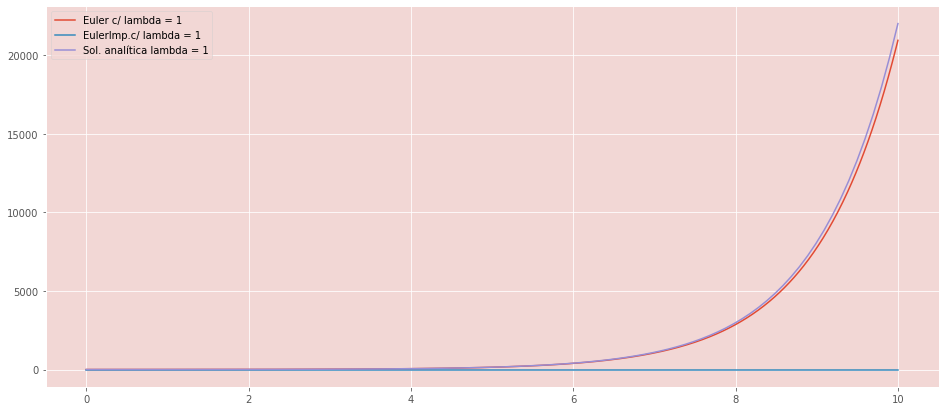

In [ ]:
def f(t, x):
    return lambd * x

def sol(t):
    return np.exp(lambd * t)    

lambdas = [1]
tf = 10
x0 = 1
t0 = 0
h = 0.01

t_plot = np.linspace(t0, tf, 100)
for lambd in lambdas:
    (t1, x1) = Euler(f, x0, t0, tf, h=h)
    (t2, x2) = EulerImplicito(f, x0, t0, tf, h=h)
    plt.plot(t1, x1, label= 'Euler c/ lambda = '+str(lambd))
    plt.plot(t2, x2, label= 'EulerImp.c/ lambda = ' + str(lambd))
    plt.plot(t_plot, sol(t_plot), label='Sol. analítica lambda = ' + str(lambd))

plt.legend()

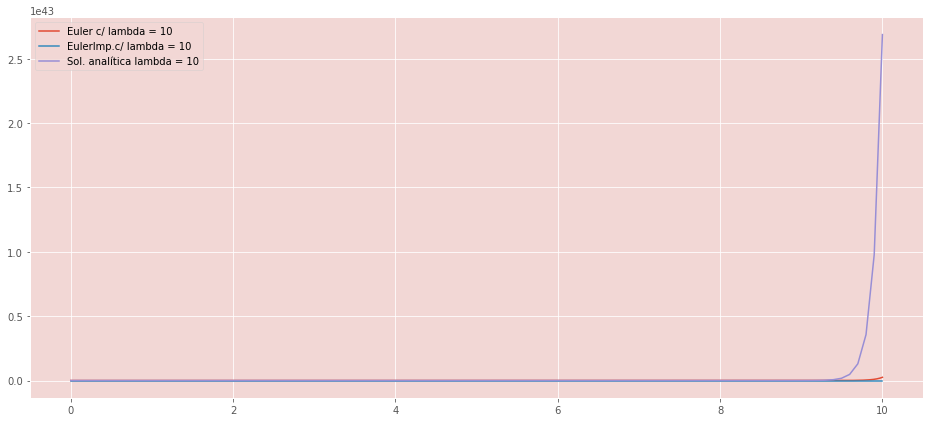

In [ ]:
lambdas = [10]
for lambd in lambdas:
    (t1, x1) = Euler(f, x0, t0, tf, h=h)
    (t2, x2) = EulerImplicito(f, x0, t0, tf, h=h)
    plt.plot(t1, x1, label= 'Euler c/ lambda = '+str(lambd))
    plt.plot(t2, x2, label= 'EulerImp.c/ lambda = ' + str(lambd))
    plt.plot(t_plot, sol(t_plot), label='Sol. analítica lambda = ' + str(lambd))

plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


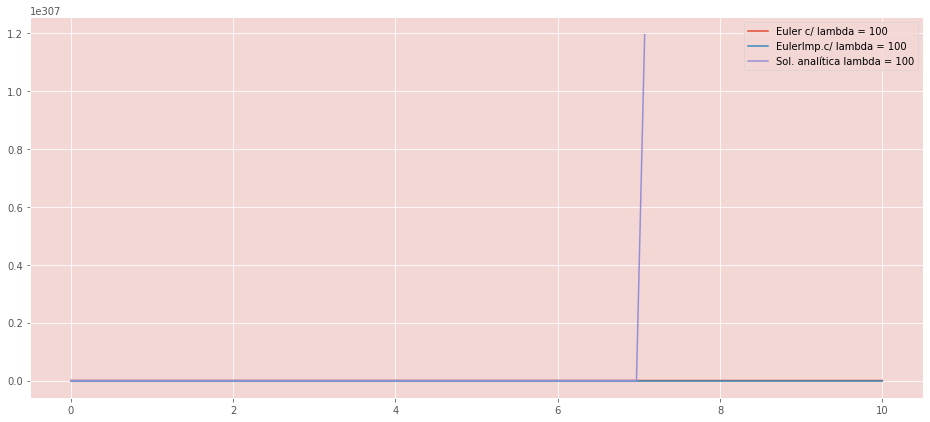

In [ ]:
lambdas = [100]
for lambd in lambdas:
    (t1, x1) = Euler(f, x0, t0, tf, h=h)
    (t2, x2) = EulerImplicito(f, x0, t0, tf, h=h)
    plt.plot(t1, x1, label= 'Euler c/ lambda = '+str(lambd))
    plt.plot(t2, x2, label= 'EulerImp.c/ lambda = ' + str(lambd))
    plt.plot(t_plot, sol(t_plot), label='Sol. analítica lambda = ' + str(lambd))

plt.legend()

## Ejercicio 6

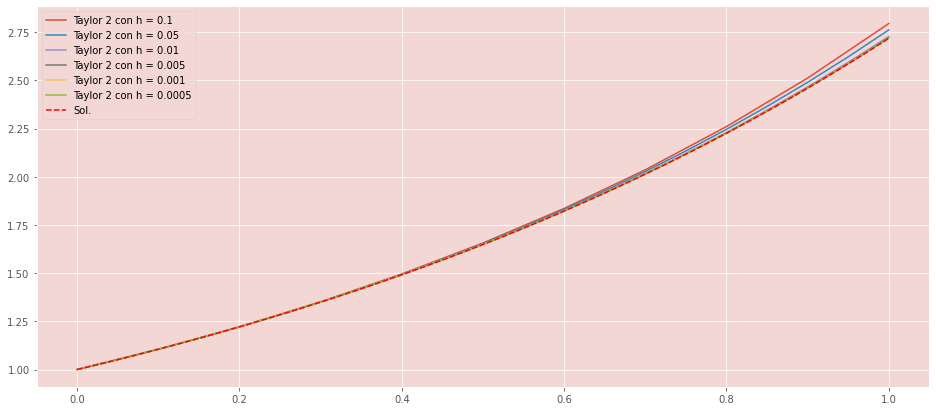

In [ ]:
hs = [.1, .05, .01, .005, .001, .0005]

def f(t, x):
    return x
def fx(t, x):
    return f(t, x) 
def ft(t, x):
    return 0

x0 = 1
t0 = 0
TF = 1
for h in hs:
    (t, x) = Taylor2(f, ft, fx, t0, TF, x0, h=h)
    plt.plot(t, x, label='Taylor 2 con h = ' + str(h))

def sol(t):
    return np.exp(t)

t_plot = np.linspace(0, 1, 100)
plt.plot(t_plot, sol(t_plot), color='red',ls='--', label= 'Sol.')

plt.legend()

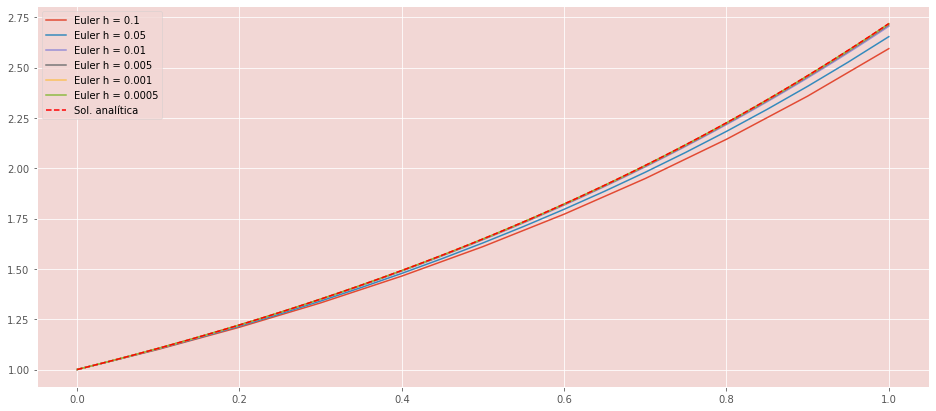

In [ ]:
for h in hs:
    (t, x) = Euler(f, x0, t0, TF, h=h)
    plt.plot(t, x, label='Euler h = ' + str(h))

plt.plot(t_plot, sol(t_plot), color='red',ls='--', label= 'Sol. analítica')
plt.legend()

orden numérico de Taylor 2 = 0.941897991422305
orden numérico de Euler = 0.9778734186441608


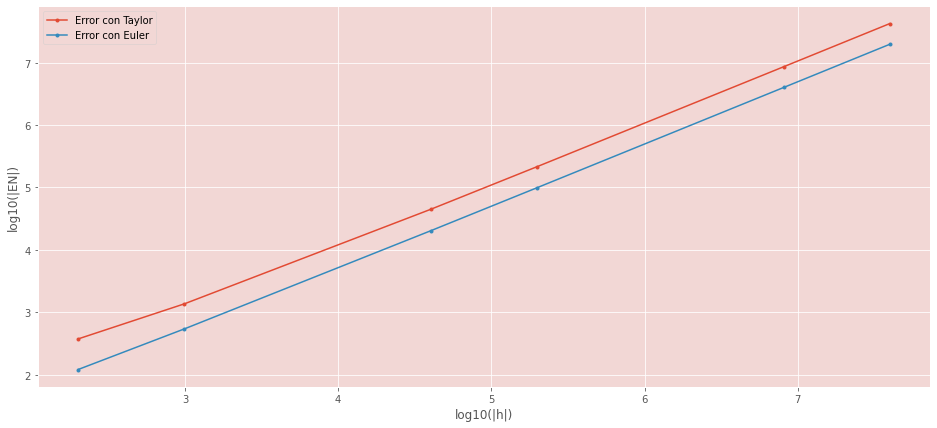

In [ ]:
erroresTaylor = []
erroresEuler = []
for h in hs:
    t, x = Taylor2(f, ft, fx, t0, TF, x0, h=h)
    x_val = x[-1]
    err = np.abs(sol(1) - x_val)
    erroresTaylor.append(err)
    
    t, x = Euler(f, x0, t0, TF, h=h)
    x_val = x[-1]
    err = np.abs(sol(1) - x_val)
    erroresEuler.append(err)

plt.plot(np.abs(np.log(hs)), np.abs(np.log(erroresTaylor)), marker = '.', label='Error con Taylor')
plt.plot(np.abs(np.log(hs)), np.abs(np.log(erroresEuler)), marker = '.', label='Error con Euler')
plt.xlabel('log10(|h|)')
plt.ylabel('log10(|EN|)')
plt.legend()

orden=(np.log(erroresTaylor[2])-np.log(erroresTaylor[1]))/(np.log(hs[2])-np.log(hs[1]))
print("orden numérico de Taylor 2 =",orden)

orden=(np.log(erroresEuler[2])-np.log(erroresEuler[1]))/(np.log(hs[2])-np.log(hs[1]))
print("orden numérico de Euler =",orden)

## Ejercicio 7

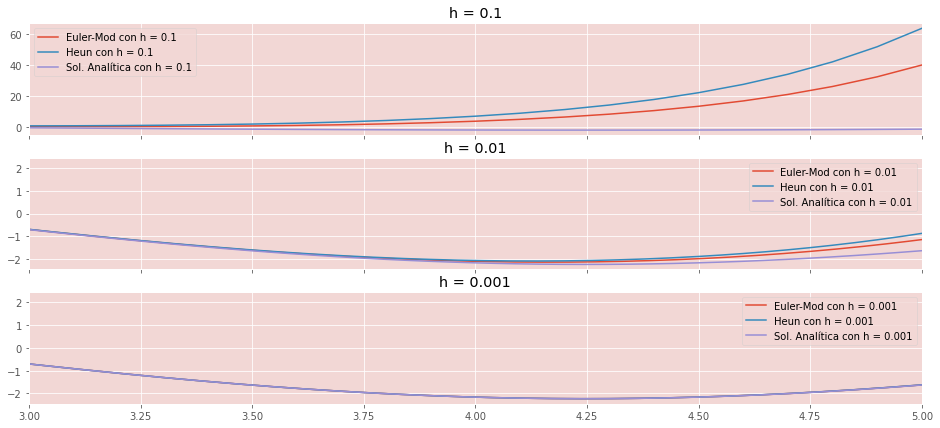

In [ ]:
def f(t, x):
    return 2*x - 5*np.sin(t)
#x(0) = 1
def sol(t):
    return 2*np.sin(t) + np.cos(t)

fig, axs = plt.subplots(3, sharex=True)
hs = [.1, .01, .001]
for h in hs:
    n = hs.index(h)
    t_eul, x_eul = EulerModificado(f, 0, 5, 1, h=h)
    t_heun, x_heun = Heun(f, 0, 5, 1, h=h)
    t_sol = np.linspace(0, 5, 100)
    x_sol = sol(t_sol)
    axs[n].plot(t_eul, x_eul, label='Euler-Mod con h = ' + str(h))
    axs[n].plot(t_heun, x_heun, label='Heun con h = ' + str(h))
    axs[n].plot(t_sol, x_sol, label= 'Sol. Analítica con h = '+str(h))
    axs[n].set_title('h = ' + str(h))
    axs[n].legend()
    plt.xlim(3, 5)

## Ejercicio 8

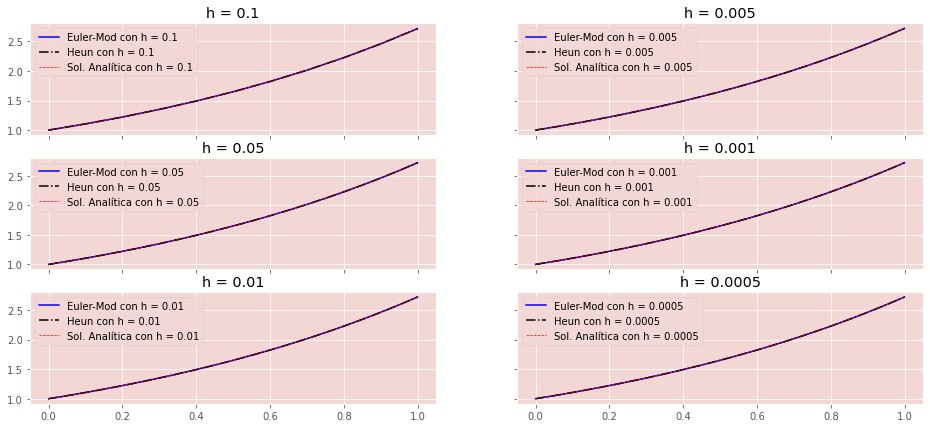

In [ ]:
hs = [.1, .05, .01, .005, .001, .0005]

def f(t, x):
    return x
def sol(t):
    return np.exp(t)

fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)
x0 = 1
t0 = 0
TF = 1

for h in hs:
    n = hs.index(h)
    t_eul, x_eul = EulerModificado(f, 0, 1, 1, h=h)
    t_heun, x_heun = Heun(f, 0, 1, 1, h=h)
    t_sol = np.linspace(0, 1, 100)
    x_sol = sol(t_sol)
    if n < 3:
        m = 0
    else:
        n = n-3
        m = 1
    axs[n, m].plot(t_eul, x_eul, color='b', label='Euler-Mod con h = ' + str(h))
    axs[n, m].plot(t_heun, x_heun, ls='-.',color='k', label='Heun con h = ' + str(h))
    axs[n, m].plot(t_sol, x_sol, lw=.7, ls='--', color='red', label= 'Sol. Analítica con h = '+str(h))
    axs[n, m].set_title('h = ' + str(h))
    axs[n, m].legend()
    



orden numérico de Heun = 1.981274630957421
orden numérico de Euler modificado= 1.981274630957421


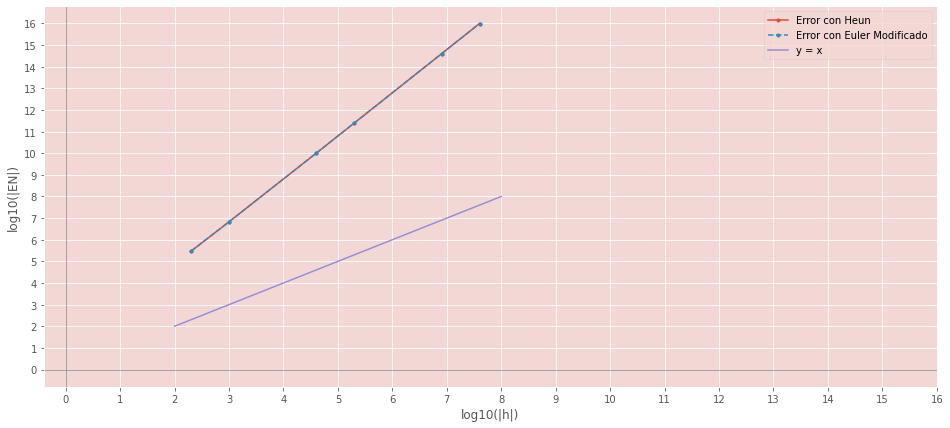

In [ ]:
erroresHeun = []
erroresEulermod = []
for h in hs:
    t, x = Heun(f, 0, 1, 1, h=h)
    x_val = x[-1]
    err = np.abs(sol(1) - x_val)
    erroresHeun.append(err)
    
    t, x = EulerModificado(f, 0, 1, 1, h=h)
    x_val = x[-1]
    err = np.abs(sol(1) - x_val)
    erroresEulermod.append(err)

plt.plot(np.abs(np.log(hs)), np.abs(np.log(erroresHeun)), marker = '.', label='Error con Heun')
plt.plot(np.abs(np.log(hs)), np.abs(np.log(erroresEulermod)), ls='--', marker = '.', label='Error con Euler Modificado')
plt.plot([2, 8], [2, 8], label='y = x')
plt.xlabel('log10(|h|)')
plt.ylabel('log10(|EN|)')
plt.axvline(color='gray', lw='.7')
plt.axhline(color='gray', lw='.7')
plt.yticks(np.array(np.linspace(0, 16, 17)))
plt.xticks(np.linspace(0, 16, 17))
plt.legend()


orden=(np.log(erroresHeun[2])-np.log(erroresHeun[1]))/(np.log(hs[2])-np.log(hs[1]))
print("orden numérico de Heun =",orden)

orden=(np.log(erroresEulermod[2])-np.log(erroresEulermod[1]))/(np.log(hs[2])-np.log(hs[1]))
print("orden numérico de Euler modificado=",orden)

## Ejercicio 9

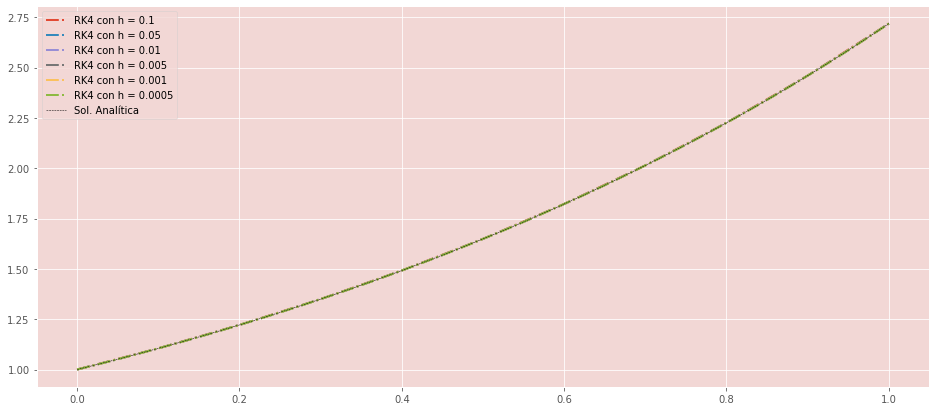

In [ ]:
hs = [.1, .05, .01, .005, .001, .0005]

def f(t, x):
    return x
def sol(t):
    return np.exp(t)

for h in hs:
    t_rk4, x_rk4 = RK4(f, 0, 1, 1, h=h)
    plt.plot(t_rk4, x_rk4, ls='-.', lw=2, label= 'RK4 con h = '+str(h))

t_plot = np.linspace(0, 1, 100)
plt.plot(t_plot, sol(t_plot), ls='--',lw=.5, color='k', label='Sol. Analítica')
plt.legend()

orden numérico de RK 4= 3.9793110138772847


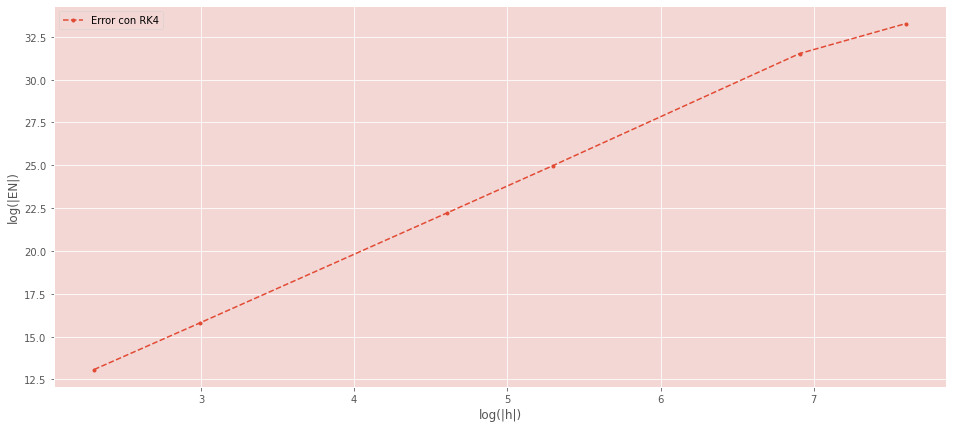

In [ ]:
erroresRK4 = []
for h in hs:
    t, x = RK4(f, 0, 1, 1, h=h)
    x_val = x[-1]
    err = np.abs(sol(1) - x_val)
    erroresRK4.append(err)

plt.plot(np.abs(np.log(hs)), np.abs(np.log(erroresRK4)), ls='--', marker = '.', label='Error con RK4')
plt.xlabel('log(|h|)')
plt.ylabel('log(|EN|)')
# plt.axvline(color='gray', lw='.7')
# plt.axhline(color='gray', lw='.7')
plt.legend()

orden=(np.log(erroresRK4[2])-np.log(erroresRK4[1]))/(np.log(hs[2])-np.log(hs[1]))
print("orden numérico de RK 4=",orden)

## Ejercicio 11

[(0, 0), (100, 25)]


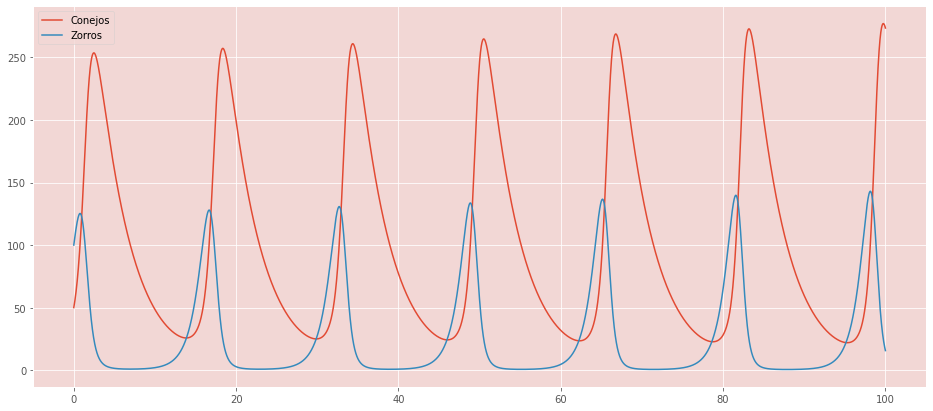

In [ ]:
# X = (x[0], x[1]) = (x, y)
def x_prima(t, X):
    return -a*X[0] + g*X[0]*X[1]

def y_prima(t, X):
    return b*X[1] - o*X[0]*X[1]

def F(t, X):
    return np.array([x_prima(t, X), y_prima(t, X)])

def x_prima_sin_t(x, y):
    return -a*x + g*x*y

def y_prima_sin_t(x, y):
    return b*y - o*x*y


a = .25
b = 1
g = .01
o = .01

t0 = 0
TF = 100
h = .01
X0 = np.array([50, 100])

eqs = EncontrarEquilibrios(x_prima_sin_t, y_prima_sin_t, 1000)
print(eqs)

t, X = EulerSistemas(F, X0, t0, TF, h=h)
plt.plot(t, X[0], label = 'Conejos')
plt.plot(t, X[1], label='Zorros')
plt.legend()

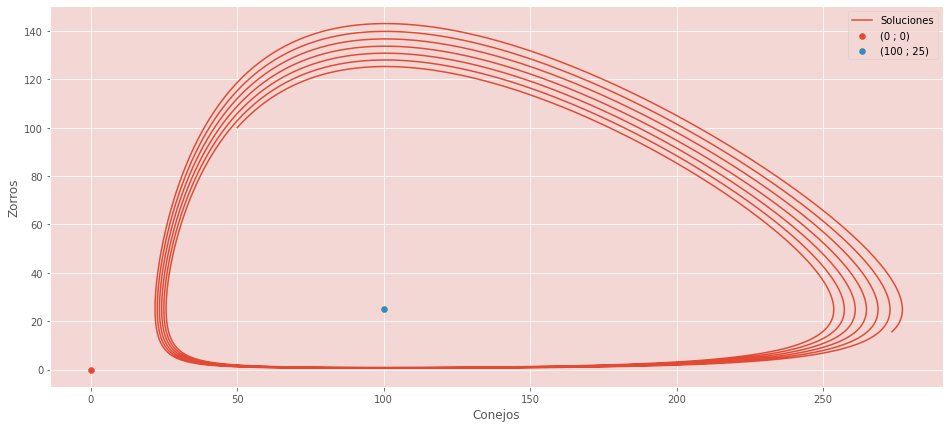

In [ ]:
plt.plot(X[0], X[1], label='Soluciones')
plt.xlabel('Conejos')
plt.ylabel('Zorros')
for pt in eqs:
    plt.scatter(pt[0], pt[1], label='('+str(pt[0])+' ; '+str(pt[1]) +')', marker='o')
plt.legend()

In [ ]:
r, f = sm.symbols('r, f', negative=False)
F1 = a*r - b*r*f
F2 = -c*f + d*r*f
a = 1.
b = .1
c = 1.5
d = .75

F1_solve = sm.Eq(F1, 0)
F2_solve = sm.Eq(F2, 0)

equilibrios = sm.solve((F1_solve, F2_solve), r, f)



[(0.0, 0.0), (2.00000000000000, 10.0000000000000)]


## Ejercicio 12

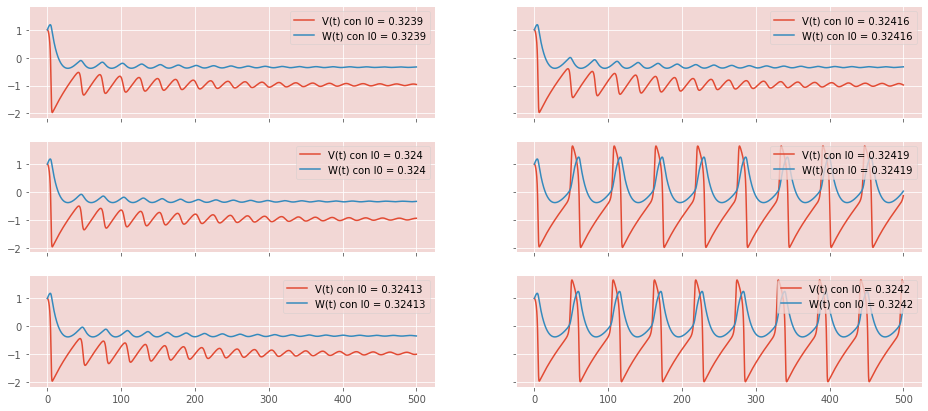

In [ ]:
def v_prima(t, X):
    return X[0] - X[0]**3 / 3 - X[1] + I0

def w_prima(t, X):
    return (X[0] + a - b*X[1]) / tau

def F(t, X):
    return np.array([v_prima(t, X), w_prima(t, X)])

fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)
a = .7
b = .8
tau = 12.5
I0s = [.3239, .3240, .32413, .32416, .32419, .3242]

t0 = 0
TF = 500
X0 = np.array([1, 1])

for I0 in I0s:
    I0 = round(I0, 5)
    n = I0s.index(I0)
    if n < 3:
        m = 0
    else:
        n = n-3
        m = 1
    t, X = EulerModificadoSistemas(F, X0, t0, TF, h=.01)
    axs[n, m].plot(t, X[0], label='V(t) con I0 = '+str(I0))
    axs[n, m].plot(t, X[1], label='W(t) con I0 = '+str(I0))
    axs[n, m].legend()


## Ejercicio 13

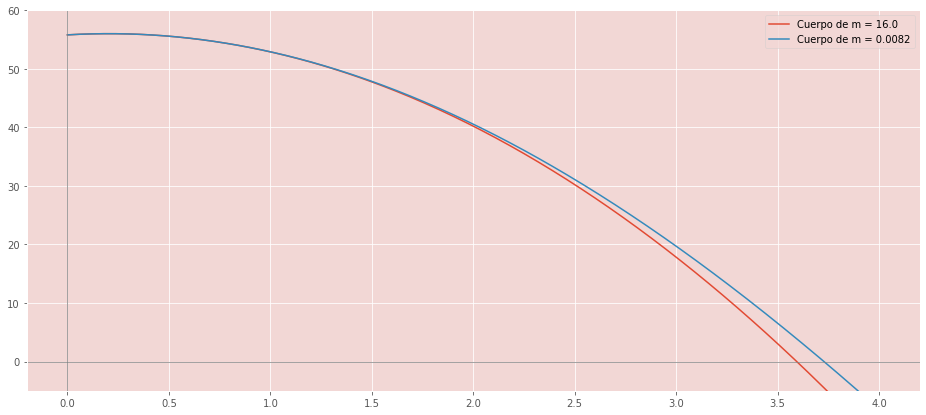

In [ ]:
def y1_prima(t, X):
    return X[1]

def y2_prima(t, X):
    return (gamma * X[1]**2)/m - g

def x_2prima(t, X):
    return np.array([y1_prima(t, X), y2_prima(t, X)])
#Params sist
g = 9.81
ms = np.array([16, .0082])
gammas = np.array([5.8*10**(-3), 3.74*10**(-5)])
#Params metodo
X0 = np.array([55.8, 2])
t0 = 0
TF = 4
h = .01
N = 56
for n in range(2):
    m = ms[n]
    gamma = gammas[n]
    t, Xn = EulerModificadoSistemas(x_2prima, X0, t0, TF, h=h)
    plt.plot(t, Xn[0], label = 'Cuerpo de m = '+str(m))



plt.ylim(-5, 60)
plt.axhline(color='grey', lw=.7)
plt.axvline(color='grey', lw=.7)
plt.legend()